In [28]:
import sys
sys.path.append('../')

import copy
import glob

from typing import Tuple, Union, List
import pandas as pd
import numpy as np
import networkx as nx
from tqdm.notebook import tqdm as tqdm
from catboost import CatBoostRegressor, Pool, metrics, cv
import catboost
import scipy

import torch
import torch.nn as nn

from torch_geometric.utils.convert import from_networkx

from src.utils import *
from dataset import *
from src.scalers import StandardScaler as Scaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from IPython.display import clear_output

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
G = nx.readwrite.read_gpickle('data/network.gpickle')

In [30]:
node_attrs = list(next(iter(G.nodes(data=True)))[-1].keys())
# node_attrs = node_attrs[3:]
node_attrs = node_attrs[3:7] + node_attrs[-2:]
pyg_graph = from_networkx(G)
pyg_graph
print(node_attrs)

['population', 'jobs', 'labor_force_rate', 'housing_sales_num_Total:', 'mean_weekend_target', 'mean_workday_target']


In [31]:
mean_target = pyg_graph.mean_target.numpy()
mean_workday_target = pyg_graph.mean_workday_target.numpy()
mean_weekend_target = pyg_graph.mean_weekend_target.numpy()
population = pyg_graph.population.numpy()
jobs = pyg_graph.jobs.numpy()

In [32]:
df = pd.DataFrame([mean_target, mean_workday_target, mean_weekend_target, population, jobs]).T
df.columns = ['mean_target', 'mean_workday_target', 'mean_weekend_target', 'population', 'jobs']
df

,mean_target,mean_workday_target,mean_weekend_target,population,jobs
0,83.161156,93.171371,58.006451,63146.0,5499.0
1,132.695175,147.817245,94.853462,24164.0,1100.0
2,58.162685,69.419662,29.911291,9781.0,1656.0
3,74.474266,87.259308,42.242718,21003.0,3590.0
4,51.094402,59.929588,28.783033,33789.0,1743.0
...,...,...,...,...,...
228,99.756096,119.729851,49.950161,17430.0,7395.0
229,226.677338,259.124664,145.294785,32419.0,6740.0
230,123.176392,141.761078,76.504837,9571.0,67.0
231,195.176285,215.234619,145.030441,10899.0,13956.0


<AxesSubplot:>

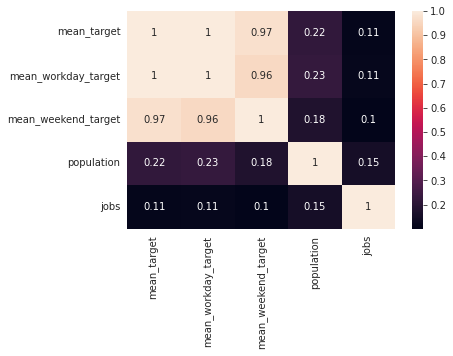

In [33]:
sns.heatmap(df.corr(), annot=True)